In [2]:
import gymnasium as gym
import numpy as np
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
import random
from tqdm import tqdm 
import imageio
import matplotlib.pyplot as plt
import os, sys 

In [3]:
def create_video(agent, env, filename="cartpole_dqn_video.mp4"):
    state, _ = env.reset()
    state = np.reshape(state, [1, agent.state_size])
    frames = []
    for time in range(500):
        frames.append(env.render())
        action = agent.act(state)
        next_state, reward, done, _, _ = env.step(action)
        next_state = np.reshape(next_state, [1, agent.state_size])
        state = next_state
        if done:
            break

    imageio.mimsave(filename, frames, fps=30)


def plot_metrics(scores, epsilons):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(scores)
    plt.title('Score per Episode vs Episode')
    plt.xlabel('Episode')
    plt.ylabel('Score')

    plt.subplot(2, 1, 2)
    plt.plot(epsilons)
    plt.title('Epsilon vs Episode')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')

    plt.tight_layout()
    plt.savefig('metrics.png')
    plt.show()

In [7]:

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=10000)
        self.gamma = 0.95  # discount factor
        self.epsilon = 1.0  # exploration-exploitation trade-off
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # model = Sequential()
        # model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        # model.add(Dense(24, activation='relu'))
        # model.add(Dense(self.action_size, activation='linear'))
        # model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        model = Sequential()
        model.add(Dense(512, input_dim = self.state_size, activation = 'relu'))
        model.add(Dense(256, activation = 'relu'))
        model.add(Dense(128, activation = 'relu'))
        model.add(Dense(self.action_size, activation = 'linear'))
        model.compile(optimizer = RMSprop(lr = self.learning_rate, rho = 0.95, epsilon = 0.01), loss = "mse", metrics = ['accuracy'])
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        states, targets = [], []
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            if done:
                target = reward
            else:
                target = (reward + self.gamma *
                          np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            # append to arrays 
            states.append(state[0])
            targets.append(target_f[0])

        # Convert lists to NumPy arrays for efficiency
        states = np.array(states)
        targets = np.array(targets)

        # Fit the model using the entire batch
        self.model.fit(states, targets, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def save_weights(self):
        self.model.save_weights("dqn_weights.h5")

  0%|          | 0/100 [00:00<?, ?it/s]

episode: 0/100, score: 22, e: 1.0


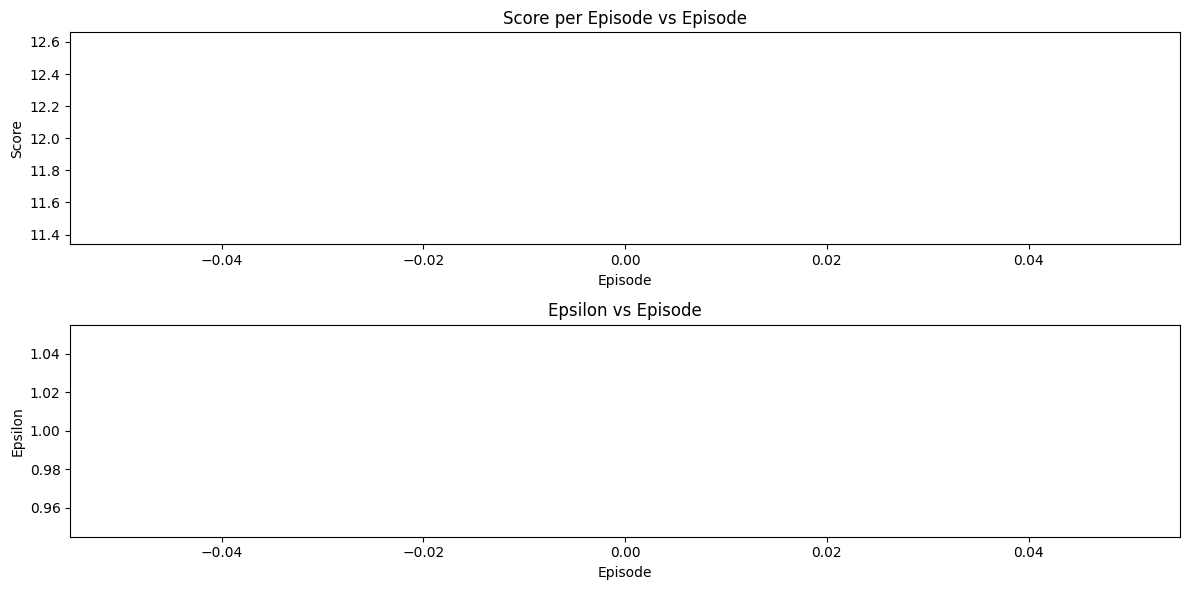

  1%|          | 1/100 [00:00<01:11,  1.39it/s]

episode: 1/100, score: 41, e: 1.0
1/1 [==============================] - 0s 22ms/step


  3%|▎         | 3/100 [00:47<28:33, 17.67s/it]

episode: 2/100, score: 53, e: 0.97
1/1 [==============================] - 0s 22ms/step


  4%|▍         | 4/100 [01:18<35:18, 22.07s/it]

episode: 3/100, score: 37, e: 0.95
1/1 [==============================] - 0s 19ms/step


  5%|▌         | 5/100 [01:41<35:16, 22.28s/it]

episode: 4/100, score: 24, e: 0.94
1/1 [==============================] - 0s 27ms/step


  6%|▌         | 6/100 [02:04<35:19, 22.55s/it]

episode: 5/100, score: 26, e: 0.92
1/1 [==============================] - 0s 19ms/step


  7%|▋         | 7/100 [02:19<31:22, 20.24s/it]

episode: 6/100, score: 17, e: 0.91
1/1 [==============================] - 0s 18ms/step


  8%|▊         | 8/100 [02:32<27:52, 18.18s/it]

episode: 7/100, score: 11, e: 0.9
1/1 [==============================] - 0s 21ms/step


  9%|▉         | 9/100 [02:53<28:55, 19.07s/it]

episode: 8/100, score: 28, e: 0.89
1/1 [==============================] - 0s 22ms/step


 10%|█         | 10/100 [03:08<26:21, 17.57s/it]

episode: 9/100, score: 12, e: 0.88
1/1 [==============================] - 0s 22ms/step
episode: 10/100, score: 15, e: 0.87


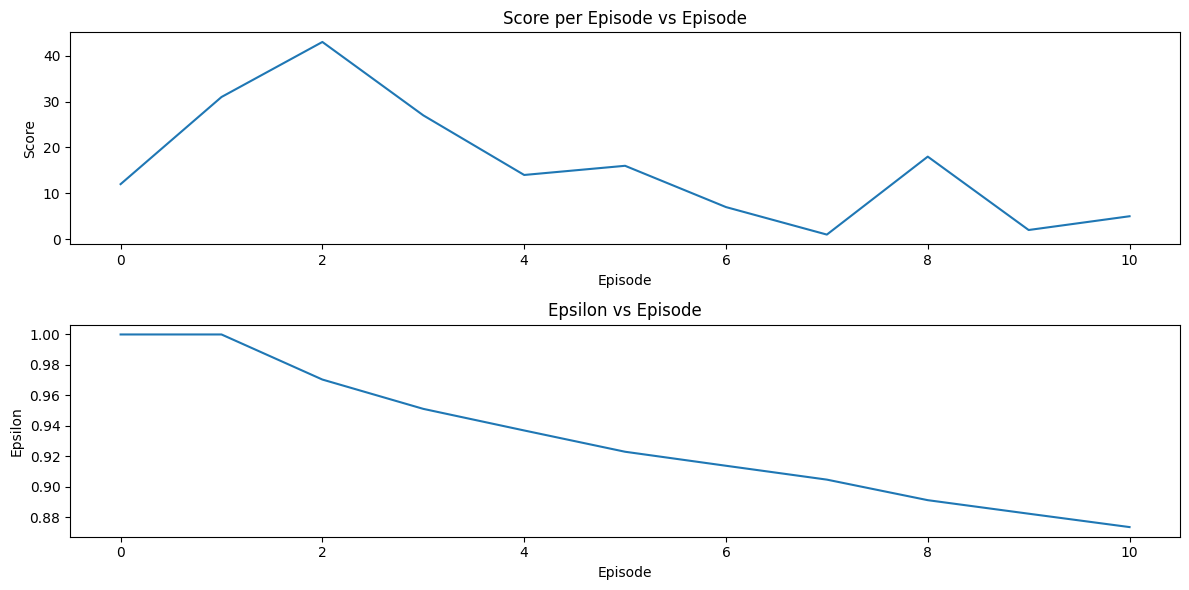

 11%|█         | 11/100 [03:24<25:38, 17.29s/it]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 12/100 [03:48<28:14, 19.26s/it]

episode: 11/100, score: 30, e: 0.86
1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 13/100 [04:12<30:00, 20.70s/it]

episode: 12/100, score: 23, e: 0.85
1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 14/100 [04:28<27:46, 19.38s/it]

episode: 13/100, score: 16, e: 0.84
1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 15/100 [04:36<22:36, 15.96s/it]

episode: 14/100, score: 10, e: 0.83
1/1 [==============================] - 0s 22ms/step


In [8]:
def main():
    env = gym.make('CartPole-v1', render_mode="rgb_array")
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    batch_size = 64
    num_episodes = 100

    # initialize arrays to keep track of rewards and epsilon
    scores = []
    epsilons = []

    for e in tqdm(range(num_episodes)):
        episode_score = 0
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        for time in range(500):
            env.render()
            action = agent.act(state)
            next_state, reward, done, _, _ = env.step(action)
            reward = reward if not done else -10
            episode_score += reward
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
        
            if done:
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, num_episodes, time, agent.epsilon))
                scores.append(episode_score)
                epsilons.append(agent.epsilon)
                if e % 10 == 0:
                    plot_metrics(scores, epsilons)
                    create_video(agent, env)
                    agent.save_weights()
                break
        
            if len(agent.memory) > batch_size and time % 10 == 0:
                agent.replay(batch_size)

    plot_metrics(scores, epsilons)
    create_video(agent, env)

    env.close()

if __name__ == "__main__":
    main()
